In [52]:
# importing required libraries
import pandas as pd
import matplotlib.pyplot as plt
#%matplotlib inline
plt.ion()
from matplotlib import patches

In [53]:
# read the csv file using read_csv function of pandas
train = pd.read_csv("annotations1.csv")
train.head()


,image_names,tool_type,xmin,xmax,ymin,ymax
0,anesthetic_09.jpg,anesthetic,265,405,65,214
1,anesthetic_1007.jpg,anesthetic,206,264,0,101
2,anesthetic_1016.jpg,anesthetic,303,350,0,117
3,anesthetic_1025.jpg,anesthetic,310,352,0,113
4,anesthetic_1034.jpg,anesthetic,293,329,0,132


In [54]:
# Number of classes
train['tool_type'].value_counts()


catheter            261
dilator             257
anesthetic          257
scalpel             250
guidewire_casing    249
guidewire           246
syringe             245
[]                    8
Name: tool_type, dtype: int64

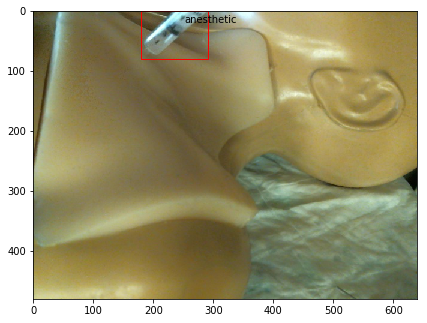

In [55]:
fig = plt.figure()
# add axes to the image
ax = fig.add_axes([0, 0, 1, 1])

# read and plot the image
image = plt.imread('train_images/anesthetic_1106.jpg')
plt.imshow(image)

#iterating over the image for different objects
for _, row in train[train.image_names == "anesthetic_1106.jpg"].iterrows():
    xmin = row.xmin
    xmax = row.xmax
    ymin = row.ymin
    ymax = row.ymax
    
    width = xmax - xmin
    height = ymax - ymin
    
    # assign different color to different classes of objects
    if row.tool_type == 'scalpel':
        edgecolor = 'r'
        ax.annotate('scalpel', xy=(xmax-40,ymin+20))
    elif row.tool_type == 'dilator':
        edgecolor = 'b'
        ax.annotate('dilator', xy=(xmax-40,ymin+20))
    elif row.tool_type == 'anesthetic':
        edgecolor = 'r'
        ax.annotate('anesthetic', xy=(xmax-40,ymin+20))
        
    # add bounding boxes to the image
    rect = patches.Rectangle((xmin,ymin), width, height, edgecolor = edgecolor, facecolor = 'none')
    
    ax.add_patch(rect)